In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('./6/results_test.csv')

In [6]:
df.head()

,Test,Vertices,Edge Probability,filename,time,Independent Set Size
0,0,5,0.182874,"6/test_v(5)_p([0.02, 0.4])_no(0).txt",0.000074,2
1,1,5,0.031255,"6/test_v(5)_p([0.02, 0.4])_no(1).txt",0.000049,3
2,2,5,0.215479,"6/test_v(5)_p([0.02, 0.4])_no(2).txt",0.000056,2
3,3,5,0.172148,"6/test_v(5)_p([0.02, 0.4])_no(3).txt",0.000055,3
4,4,5,0.293892,"6/test_v(5)_p([0.02, 0.4])_no(4).txt",0.000056,2


In [10]:
# for each vertex size, there's 50 samples, construct a 90% CI for the mean time

# Function to calculate 90% confidence interval
def compute_confidence_interval(data, confidence=0.90):
    mean = data.mean()
    sem = stats.sem(data)  # Standard error of the mean
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return mean, mean - margin, mean + margin

# Grouping by 'Vertices' and calculating mean and confidence intervals
results_df = (
    df.groupby("Vertices")["time"]
    .apply(lambda x: compute_confidence_interval(x, confidence=0.90))
    .reset_index(name="Stats")
)

# Split the tuple into separate columns for clarity
results_df[["Mean Time", "Lower CI", "Upper CI"]] = pd.DataFrame(results_df["Stats"].tolist(), index=results_df.index)

# Drop the temporary "Stats" column
results_df = results_df.drop(columns=["Stats"])

# Display the results
print(results_df)


    Vertices  Mean Time   Lower CI   Upper CI
0          5   0.000051   0.000049   0.000052
1         15   0.000468   0.000444   0.000493
2         25   0.001625   0.001497   0.001752
3         35   0.004589   0.004149   0.005029
4         45   0.008588   0.007521   0.009655
5         55   0.018692   0.016381   0.021004
6         65   0.029691   0.025756   0.033626
7         75   0.055499   0.048636   0.062363
8         85   0.076225   0.064340   0.088110
9         95   0.110550   0.094070   0.127030
10       105   0.161670   0.137208   0.186132
11       115   0.273659   0.235920   0.311398
12       125   0.334300   0.281854   0.386745
13       135   0.448663   0.377089   0.520236
14       145   0.600905   0.522308   0.679501
15       155   0.516647   0.405944   0.627350
16       165   0.882542   0.742047   1.023037
17       175   1.120275   0.931187   1.309364
18       185   1.462857   1.252436   1.673279
19       195   1.711735   1.388547   2.034922
20       205   2.115758   1.726685

In [22]:
results_df

,Vertices,Mean Time,Lower CI,Upper CI,log_Vertices,log_Mean_Time
0,5,0.000051,0.000049,0.000052,1.609438,-9.888228
1,15,0.000468,0.000444,0.000493,2.708050,-7.666113
2,25,0.001625,0.001497,0.001752,3.218876,-6.422386
3,35,0.004589,0.004149,0.005029,3.555348,-5.384068
4,45,0.008588,0.007521,0.009655,3.806662,-4.757352
5,55,0.018692,0.016381,0.021004,4.007333,-3.979655
6,65,0.029691,0.025756,0.033626,4.174387,-3.516910
7,75,0.055499,0.048636,0.062363,4.317488,-2.891389
8,85,0.076225,0.064340,0.088110,4.442651,-2.574062
9,95,0.110550,0.094070,0.127030,4.553877,-2.202286


In [16]:
from sklearn.linear_model import LinearRegression

In [20]:


# Log-transform the data for 'Vertices' and 'Mean Time'
results_df["log_Vertices"] = np.log(results_df["Vertices"])
results_df["log_Mean_Time"] = np.log(results_df["Mean Time"])

# Prepare data for linear regression
X = results_df[["log_Vertices"]]
y = results_df["log_Mean_Time"]

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients
a = model.intercept_  # Intercept (log scale)
b = model.coef_[0]    # Slope (log scale)

# Convert to original scale: y = exp(a) * x^b
exp_a = np.exp(a)

# Store the equation
fitted_equation = f"y = {exp_a} * x^{b:.4f}"

# Print the equation
print("Fitted equation:", fitted_equation)

Fitted equation: y = 3.267372877883014e-08 * x^3.4041


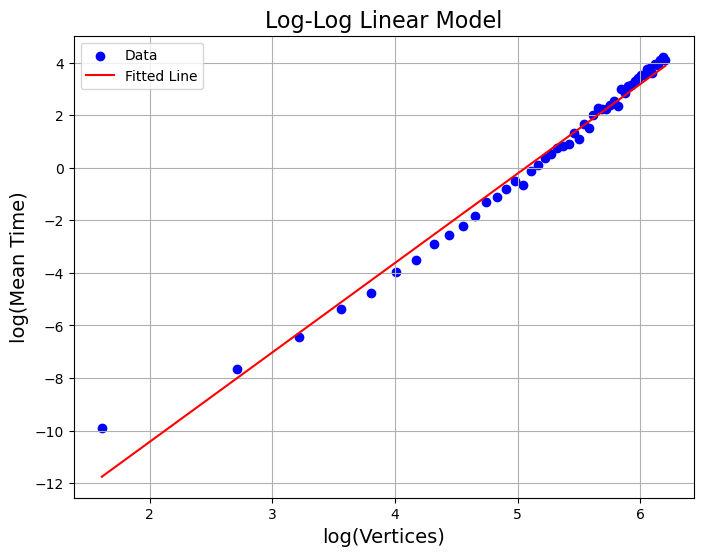

In [19]:
# Plot the results
plt.figure(figsize=(8, 6))

# Plot the original data points in log-log scale
plt.scatter(results_df["log_Vertices"], results_df["log_Mean_Time"], color="blue", label="Data")

# Plot the fitted line
log_x = np.linspace(results_df["log_Vertices"].min(), results_df["log_Vertices"].max(), 100)
log_y = a + b * log_x
plt.plot(log_x, log_y, color="red", label="Fitted Line")

# Add labels and legend
plt.title("Log-Log Linear Model", fontsize=16)
plt.xlabel("log(Vertices)", fontsize=14)
plt.ylabel("log(Mean Time)", fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

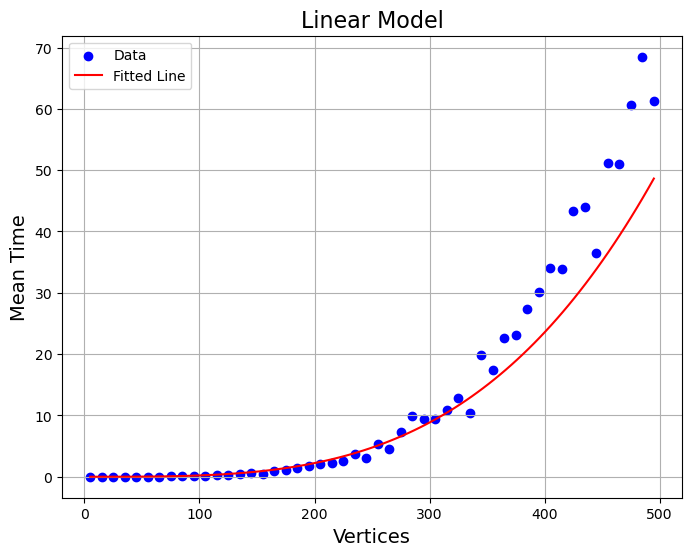

In [21]:
# do the non-log log plot
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(results_df["Vertices"], results_df["Mean Time"], color="blue", label="Data")

# Plot the fitted line
x = np.linspace(results_df["Vertices"].min(), results_df["Vertices"].max(), 100)
y = exp_a * x ** b
plt.plot(x, y, color="red", label="Fitted Line")

# Add labels and legend
plt.title("Linear Model", fontsize=16)
plt.xlabel("Vertices", fontsize=14)
plt.ylabel("Mean Time", fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [24]:
results_df.to_csv('./6/results_analysis.csv', index=False)